# CS610 Assignment 1

***Requirement on Submission***
1.	Submit ONLY your Jupyter Notebook. 
Do not submit the given dataset.
Do not zip your Jupyter Notebook. 
Your answers to all questions should be in your Jupyter Notebook.

2.	Organize your code so that it clearly shows your intention and logic. 
To organize your code, you can either:
a.	Add comments in your code, or 
b.	Add a mark-up cell to explain what you want to do in the following code cell
You can use a mix of the above two throughout your Jupyter Notebook. No need to consistently use one way.

3.	Make sure your code can run without any adjustment on grader’s machine. 
Adjust your answer before submission if you run your code on Google Colab and use any cloud drive. 
Note: the dataset is supposed to be unzipped and put in the same directory with your Jupyter Notebook.
Note: you can assume grader’s machine has installed the packages you use in your code.

4.	Other than your code, create a concluding section under your answer to each question. Tabulate your numbers when a table is provided for you to fill in.

5.	Limit your lines of code in a single code cell: no more than 50 lines, including comments.

***Failure to meet the requirements above will cause deduction in your grade.***

## Introduction

This assignment uses a small subset of the data from Kaggle's [Yelp Business Rating Prediction](https://www.kaggle.com/c/yelp-recsys-2013) competition.

**Description of the data:**

- **`yelp.csv`** contains the dataset. There is no need to download anything from the Kaggle website.
- Each observation (row) in this dataset is a review of a particular business by a particular user.
- The **stars** column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars are better.) In other words, it is the rating of the business by the person who wrote the review.
- The **text** column is the text of the review.

**Goal:** Predict the star rating of a review using **only** the review text.

Use **random_state = 2022** wherever applicable.

In [1]:
# import the libraries and load the dataset
import pandas as pd
# import the rest of the libraies/packages
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import linear_model
from sklearn import metrics
import math

In [2]:
df = pd.read_csv('yelp.csv')

## Task 1: Data Exploration (6 points)
Explore the dataset and generate the word cloud for reviews with stars == 1 and stars == 5, respectively. Check the [word_cloud](https://github.com/amueller/word_cloud) library. (4 points)

An example of word cloud is showed below. 

![word cloud](https://static.commonlounge.com/fp/600w/FxEgN5woHmXOJOLtm7oGGenV81520493685_kc)

What do you observe? Does the generated word cloud match your expectation? Elaborate. (2 points)

<b>Answer:<b/>

(-0.5, 399.5, 199.5, -0.5)

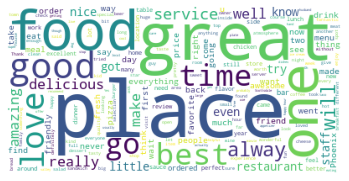

In [3]:
df5 = df[df.stars == 5]
df1 = df[df.stars == 1]
text5 = ''
for line in df5.text:
    text5 += line + " "
wordcloud5 = WordCloud(background_color="white").generate(text5)
plt.imshow(wordcloud5)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

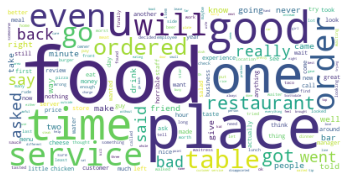

In [4]:
text1 = ''
for line in df1.text:
    text1 += line + " "
wordcloud1 = WordCloud(background_color="white").generate(text1)
plt.imshow(wordcloud1)
plt.axis("off")

<b>Answer: The output is not as good as expected.<br>
The expectation is that 5-star rating reviews should contain more positive words such as those used for complements, while 1-star rating reviews should contain more words with negative connotations. Hence their word clouds should have these opposite meaning groups of words dominating. However, both word clouds are dominated by neutral and desriptive words such as "food", "service" and "place". We can see that while 5-star word cloud does contains several words with positive connotations such as "great", "good" and "delicious", it mainly has neutral words. Moreover, 1-star ratings even have a positive word "good" as one of the most frequent, while the word "bad" is relatively small, indicating less frequency.<br>
Counting the most frequently appearing words will not generate good indications of whether a review is negative. This is the indication of the need for pre-processing these ratings in order to remove highly repetitive but newtral words as listed above, in order to put more focus on sentiment-related words in the reviews.<b/>

## Task 2: Linear Regression (24 points)

In this task, you are to build a linear regression model to predict the stars based solely on the text feature. You need to follow the below steps.
1. Split the data into train (80%) and test (20%) using random_state = 2022
2. Use [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) to generate a vector representation of the text. Use ngram_range = (1, 2) and min_df=10
3. Build a linear regression model using the default parameters. 


<b>Answer:<b/>

In [5]:
x = df['text']
y = df['stars']
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 2022)
vectorizer = CountVectorizer(ngram_range = (1, 2), min_df=10)
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.fit_transform(x_test)
vectorizer.fit(x)
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)
X_train.toarray()
X_test.toarray()
Y_train = np.array(y_train)
Y_test = np.array(y_test)
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression()

Explain how CountVectorizer works based on the documentation from scikit-learn.org. (2 points)

<b>Answer: CountVectorizer create tokens from the words appearing in the input corpus into a bag of words (vocabulary). These tokens are understood as attributes for modelling. Then it converts the list of documents (sentences/review texts) to a matrix where each row is a document, and each column is the frequency that each word in the vocabulary appears in the document.<b\>

Explain what do ngram_range and min_df mean? (2 points)

<b>Answer: ngram_range: min of 1-word and max of 2-word length to be included as a feature <br>
min_df = 10: ignore features that appear less than 10 times in the whole vocabulary<b/>

What are the RMSE and $R^2$ scores on the train and test dataset, respectively? What do you observe? (3 points)

<b>Answer:<b/>

In [6]:
Y_pred = regr.predict(X_test)
ssr = np.sum(Y_pred - np.mean(Y_test)) ** 2
mse = metrics.mean_squared_error(Y_test, Y_pred)
rmse = math.sqrt(mse)
print('R^2 score: %.2f' % regr.score(X_test, Y_test))
print('RMSE: %.2f' % rmse)

R^2 score: -4.14
RMSE: 2.74


<b>the RMSE is 2.74 and the R2 score is -4.14. <br>
    Based on the negative $R^2$ score, the model is not a good fit to the dataset. <b/>

List the 10 most important features based on the magnitude of the coefficients. Do these attributes make sense? (3 points) 

Hint 
1. check the documentation of linear regression on how to get the model coefficients. 
2. It's easier to generate a dataframe with feature names and their corresponding coefficients.

<b>Answer:<b/>

In [7]:
#Create a dataframe containing attributes with actual words via .get_feature_names() method,
#with their corresponding coefficient values
df_features = pd.DataFrame(data = {'Coefficient':list(regr.coef_),'Feature_Name':vectorizer.get_feature_names()})
#create coefficient magnitude column and sort the dataframe by this column
#followed by getting the top 10 coefficients
df_features['Coefficient_Magnitude'] = abs(df_features['Coefficient'])
df_features.sort_values(by='Coefficient_Magnitude', ascending=False).head(10)

,Coefficient,Feature_Name,Coefficient_Magnitude
18880,3.997244,unfortunately,3.997244
7190,-3.471771,great breakfast,3.471771
14210,2.724579,sadly,2.724579
7917,2.646183,here has,2.646183
1317,-2.610406,and yummy,2.610406
3785,-2.263018,closed,2.263018
15893,2.004099,super,2.004099
5562,2.001746,excellent,2.001746
1962,2.001745,awesome,2.001745
8622,1.999875,intense,1.999875


<b>Observation: Most of the top features carry good indication of positivity or negativity for reviews. However, some top features by this model have ambiguous/neutral meanings ("here has","closed") or non-universal meaning to be applied to other cases ("great breakfast").</b>

Build 4 Lasso regression models with alpha in [0.0001, 0.001, 0.01, 0.1] and create a table with the below schema. Think about what is model complexity here. Comment on the observations.(4 points)

| alpha  | Training_RMSE | Model Complexity | Test RMSE |
|--------|---------------|------------------|-----------|
| 0.0001 |               |                  |           |
| 0.001  |               |                  |           |
| 0.01   |               |                  |           |
| 0.1    |               |                  |           |

<b>Answer:<b/>

In [8]:
# List of alpha constants that multiplies the L1 term, controlling regularization strength. 
# The higher the alpha, the more regularization, the more penalty given to complex models, lower complexity may improve model variance with test data (reduced over-fitting) at the expense of training set accuracy
alpha_list = [0.0001, 0.001, 0.01, 0.1]
col_labels_lasso = ['Alpha', 'Training RMSE', 'Model Complexity - Coef Norm1', 'Model Complexity - Coef Sum', 'Test RMSE']

In [9]:
result_lasso_arr = []
for alpha in alpha_list:
    result_lasso_list=[]
    #build model:
    lasso = linear_model.Lasso(alpha)
    lasso.fit(X_train, Y_train)
    #applied to test data
    Y_pred_test = lasso.predict(X_test)
    mse_test = metrics.mean_squared_error(Y_test, Y_pred_test)
    rmse_test = math.sqrt(mse_test)
    #applied to train data
    Y_pred_train = lasso.predict(X_train)
    mse_train = metrics.mean_squared_error(Y_train, Y_pred_train)
    rmse_train = math.sqrt(mse_train)
    #compute complexity by L1-norm of the model parameter values
    complexity_coef_norm1 = np.linalg.norm(lasso.coef_, ord=1)
    #compute complexity by sum of the model parameter magnitudes
    complexity_coef_sum = np.sum(np.abs(lasso.coef_))
    #output result
    print(f'Alpha value: {alpha}')
    print(f'Train RMSE: {rmse_train}')
    print(f'Model Complexity - Norm1 of Coefficients: {complexity_coef_norm1}')
    print(f'Model Complexity - Sum of Coefficients: {complexity_coef_sum}')
    print(f'Test RMSE: {rmse_test}\n')
    result_lasso_list = [alpha, rmse_train, complexity_coef_norm1, complexity_coef_sum, rmse_test]
    result_lasso_arr.append(result_lasso_list)

C:\Users\phuon\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:512: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 795.7444106318228, tolerance: 1.1831348875
  model = cd_fast.sparse_enet_coordinate_descent(


Alpha value: 0.0001
Train RMSE: 0.28467264669844194
Model Complexity - Norm1 of Coefficients: 882.2155881870633
Model Complexity - Sum of Coefficients: 882.2155881870633
Test RMSE: 1.2854671316385702

Alpha value: 0.001
Train RMSE: 0.7526871576909596
Model Complexity - Norm1 of Coefficients: 94.92150768863918
Model Complexity - Sum of Coefficients: 94.92150768863918
Test RMSE: 0.9272679781444465

Alpha value: 0.01
Train RMSE: 0.9864238817647295
Model Complexity - Norm1 of Coefficients: 7.575738784391223
Model Complexity - Sum of Coefficients: 7.575738784391223
Test RMSE: 0.9902177074778316

Alpha value: 0.1
Train RMSE: 1.1544163106925713
Model Complexity - Norm1 of Coefficients: 0.3839481480877835
Model Complexity - Sum of Coefficients: 0.3839481480877835
Test RMSE: 1.1408917962699803



In [10]:
df_lasso = pd.DataFrame(result_lasso_arr,columns=col_labels_lasso)
df_lasso

,Alpha,Training RMSE,Model Complexity - Coef Norm1,Model Complexity - Coef Sum,Test RMSE
0,0.0001,0.284673,882.215588,882.215588,1.285467
1,0.0010,0.752687,94.921508,94.921508,0.927268
2,0.0100,0.986424,7.575739,7.575739,0.990218
3,0.1000,1.154416,0.383948,0.383948,1.140892


List the 10 most important features based on the magnitude of the coefficients of the best performing model (think about what metric should we use to decide on the best model). Do we have a better list of features now? (3 points)

<b>Answer: Here the Norm 1 and sum of magnitude of model coefficients are the same, and can both be used as a measure of model complexity. A higher alpha value penalizes more complex models, hence the model complexity is reduced by removing unimportant features. The test RMSE is reduced when alpha is increased from 0.0001 to 0.001, hence model ability to generalize improves. This is achieved at the expense of higher training errors seen in the increased Traning RMSE values. Beyond alpha of 0.001, the model test errors increases again. This is where the lower complexity fails to generalize as too many important features are removed. Hence the best model seems to be that with alpha = 0.001 at the point where model ability to generalize has not been maximized, at a relatively low complexity.<br>
Based on the top 10 features with the highest magnitude below. It is easy to see that the features carry more clear-cut meanings. Stronger words that clearly give hints of reviews such as "disaster", "horrible" and "worst"/"not worth", which were absent in the normal regression built previously, now appear.
    However it should be noted that the top features now contain all with negative meanings.
<b/>

In [11]:
# Regenerate the best performing model:
lasso_best = linear_model.Lasso(0.001)
lasso_best.fit(X_train, Y_train)
df_lasso_features = pd.DataFrame(data = {'Coefficient':list(lasso_best.coef_),'Feature_Name':vectorizer.get_feature_names()})
df_lasso_features['Coefficient_Magnitude'] = abs(df_lasso_features['Coefficient'])
df_lasso_features.sort_values(by='Coefficient_Magnitude', ascending=False).head(10)

,Coefficient,Feature_Name,Coefficient_Magnitude
4804,-0.647376,disaster,0.647376
8016,-0.591869,hire,0.591869
11472,-0.577143,not worth,0.577143
8105,-0.573414,horrible,0.573414
12543,-0.534934,overpriced,0.534934
5302,-0.495857,elsewhere,0.495857
20766,-0.477152,worst,0.477152
14178,-0.472983,rude,0.472983
1977,-0.448469,awful,0.448469
15855,-0.429442,sucks,0.429442


Buld 4 Ridge regression models with alpha in [0.1, 1, 10, 100, 500, 1000] and create a table with the below schema. Think about what is model complexity here. Comment on the observations.(4 points)

| alpha  | Training_RMSE | Model Complexity | Test RMSE |
|--------|---------------|------------------|-----------|
| 0.1 |               |                  |           |
| 1  |               |                  |           |
| 10   |               |                  |           |
| 100    |               |                  |           |
| 500    |               |                  |           |
| 1000    |               |                  |           |

<b>Answer:<b/>

In [12]:
alpha_list = [0.0001, 0.001, 0.01, 0.1]
col_labels_ridge = ['Alpha', 'Training RMSE', 'Model Complexity - Coef Norm2', 'Model Complexity - Coef Sum', 'Test RMSE']

In [13]:
result_ridge_arr = []
for alpha in alpha_list:
    result_ridge_list=[]
    #build model:
    ridge = linear_model.Ridge(alpha)
    ridge.fit(X_train, Y_train)
    #applied to test data
    Y_pred_test = ridge.predict(X_test)
    mse_test = metrics.mean_squared_error(Y_test, Y_pred_test)
    rmse_test = math.sqrt(mse_test)
    #applied to train data
    Y_pred_train = ridge.predict(X_train)
    mse_train = metrics.mean_squared_error(Y_train, Y_pred_train)
    rmse_train = math.sqrt(mse_train)
    #compute complexity by L1-norm of the model parameter values
    complexity_coef_norm2 = np.linalg.norm(ridge.coef_, ord=2)
    #compute complexity by sum of the model parameter magnitude
    complexity_coef_sum = np.sum(np.abs(ridge.coef_))
    #output result
    print(f'Alpha value: {alpha}')
    print(f'Train RMSE: {rmse_train}')
    print(f'Model Complexity - Norm2 of Coefficients: {complexity_coef_norm2}')
    print(f'Model Complexity - Sum of Coefficients: {complexity_coef_sum}')
    print(f'Test RMSE: {rmse_test}\n')
    result_ridge_list = [alpha, rmse_train, complexity_coef_norm2, complexity_coef_sum, rmse_test]
    result_ridge_arr.append(result_ridge_list)

Alpha value: 0.0001
Train RMSE: 0.0012303931461337978
Model Complexity - Norm2 of Coefficients: 36.64069901773063
Model Complexity - Sum of Coefficients: 3895.981805530726
Test RMSE: 2.7030900830960536

Alpha value: 0.001
Train RMSE: 0.003745603621234341
Model Complexity - Norm2 of Coefficients: 33.717043911983
Model Complexity - Sum of Coefficients: 3586.1439959073214
Test RMSE: 2.4854657886031193

Alpha value: 0.01
Train RMSE: 0.012055571378904154
Model Complexity - Norm2 of Coefficients: 28.859082143310708
Model Complexity - Sum of Coefficients: 3068.1678570182726
Test RMSE: 2.147358610116469

Alpha value: 0.1
Train RMSE: 0.03727228443076863
Model Complexity - Norm2 of Coefficients: 24.386014001371954
Model Complexity - Sum of Coefficients: 2618.458894225348
Test RMSE: 1.8434694365604587



In [14]:
df_ridge = pd.DataFrame(result_ridge_arr,columns=col_labels_ridge)
df_ridge

,Alpha,Training RMSE,Model Complexity - Coef Norm2,Model Complexity - Coef Sum,Test RMSE
0,0.0001,0.001230,36.640699,3895.981806,2.703090
1,0.0010,0.003746,33.717044,3586.143996,2.485466
2,0.0100,0.012056,28.859082,3068.167857,2.147359
3,0.1000,0.037272,24.386014,2618.458894,1.843469


List the 10 most important features based on the magnitude of the coefficients of the best performing model (think about what metric should we use to decide on the best model). Do the top features make sense? (3 points)

<b>Answer:<br> 
    * It can be seen from the sum of coefficient magnitudes that ridge regression generates much more complex models thatn lasso regression previously. This is because lasso regression allows coefficients to be reduced all the way to zeros, hence completely remove the attributes, while ridge cannot. Model complexity can also be seen via the more commonly use measure of Norm2. Based on the trend of alpha and RMSE values, there is a monotonous trend: as alpha increases, more regularization is applied, model complexity is reduced at the expense of higher training errors, and achieve better (lower) test errors. The model is increasingly better to generalize.<br>
    * We dont see the issue of reversal of this trend as seen in the lasso regression. This may be because there is no complete removal of any attributes, regardless of their importance by ridge regression. Hence the risk of removing important features that can generalize test data is reduced. <br>
    * We can take the model with alpha of 0.1 as the best performing one due to being the simplest but still ensure low test errors.<br>
    * As seen from the top 10 features below, the model is not as good as lasso previously. This is because while strong negative words are still ranked as strong attributes, some neutral/ambiguous words such as "ing", "drive through" and "here has" still appear.<b/>

In [15]:
# Regenerate the best performing model:
ridge_best = linear_model.Ridge(0.1)
ridge_best.fit(X_train, Y_train)
df_ridge_features = pd.DataFrame(data = {'Coefficient':list(ridge_best.coef_),'Feature_Name':vectorizer.get_feature_names()})
df_ridge_features['Coefficient_Magnitude'] = abs(df_ridge_features['Coefficient'])
df_ridge_features.sort_values(by='Coefficient_Magnitude', ascending=False).head(10)

,Coefficient,Feature_Name,Coefficient_Magnitude
8582,-2.569475,ing,2.569475
9280,-2.053365,just don,2.053365
18880,1.965384,unfortunately,1.965384
5110,-1.844819,drive through,1.844819
11463,-1.614051,not there,1.614051
7917,1.583356,here has,1.583356
11305,-1.557403,no good,1.557403
8108,-1.548850,horrible service,1.548850
3785,-1.422038,closed,1.422038
15852,-1.334938,sucked,1.334938


<b>Summary: Overall, linear regression models can generate good predicting features that can predict the rating of reviews better than simply using word clouds. However, it is observed that these models are very slow to run, and still contain neutral words in the top rated features. The model complexity is also very high for Lasso, as seen in the sum of coefficient magnitudes ranging in thousands. This makes it a challenge to be used in practice. While Ridge regression can remove many features and make much simpler models, it risks underfitting when too much regularization is applied.

## Task 3: Logistic Regression (29 points)

In this task, you are to build a logistic regression model to predict the highest and lowest stars based on the text feature. You need to follow the below steps.
1. Create a new DataFrame that containings only the 5-star and 1-star reviews.
2. Split the data into train (80%) and test (20%) using random_state = 2022
3. Use [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) to generate a vector representation of the text. Use ngram_range = (1, 2) and min_df=10
4. Build a logistic regression model. Set penalty='none', max_iter=1000, random_state=2022

<b>Answer:<b/>

In [16]:
df_1_and_5 = df[(df.stars == 5) | (df.stars == 1)]
# df_1_and_5.sort_values(by=['stars','date'], ascending=False)

In [17]:
x = df_1_and_5['text']
y = df_1_and_5['stars']
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 2022)

vectorizer = CountVectorizer(ngram_range = (1, 2), min_df=10)
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.fit_transform(x_test)

vectorizer.fit(x)
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)
Y_train = np.array(y_train)
Y_test = np.array(y_test)

In [18]:
estimator = linear_model.LogisticRegression(solver = 'lbfgs',penalty='none', max_iter=1000, random_state=2022) 
estimator.fit(X_train, Y_train)
Y_pred = estimator.predict(X_test)

Generate the confusion matrix for train and test set. What do you observe? (3 points)

<b>Answer:<b/>

In [19]:
# 5-star is defined to be positive:
count_tp, count_tn, count_fp, count_fn = 0, 0, 0, 0
for i in range(len(Y_test)):
    if Y_test[i] == 5:
        if Y_pred[i] == 5:
            count_tp += 1
        else:
            count_fn += 1
    else:
        if Y_pred[i] == 5:
            count_fp += 1
        else:
            count_tn += 1
print(count_tp, '\t', count_fn)
print(count_fp, '\t', count_tn)
print('Accuracy:', (count_tp + count_tn) / (count_tp + count_fp + count_tn + count_fn))
print('Precision:', count_tp / (count_tp + count_fp))
print('Recall:', count_tp / (count_tp + count_fn))

652 	 28
27 	 111
Accuracy: 0.9327628361858191
Precision: 0.9602356406480118
Recall: 0.9588235294117647


In [20]:
# confirming the class labels by couting the number of records with 1 and 5 stars and compare with the confustion matrix:
pd.DataFrame(y_test).groupby('stars')['stars'].count()

stars
1    138
5    680
Name: stars, dtype: int64

In [21]:
# checking the classes by built-in method:
estimator.classes_
# from sklearn documentation, The method ..predict_proba() returned estimates for all classes are ordered by the label of classes.
# hence the 1st column corersponds to 1-star, second for 5-star

array([1, 5], dtype=int64)

<b>Observation: based on the confusion matrix, we can see that both precision and recall are high, and this seems to suggest the model is performing well in classifying reviews to 1 and 5 star. <b/>

From the test set, take a look at the two false positives with highest predicted probabilities and the two false negatives with the loweest predicted probabilities. Why do you think the model predict them as positive/negative? (4 points)

In [22]:
# Calculate the probability of predicted classes
Y_pred_prob = estimator.predict_proba(X_test)
#from documentation, The returned estimates for all classes are ordered by the label of classes.
#hence the 1st column corersponds to 1-star, second for 5-star
Y_pred_prob_1star = Y_pred_prob[:, 0]
Y_pred_prob_5star = Y_pred_prob[:, 1]

# Check and obtain X and Y values in the training set that yield false positives
X_test_fp=[]
Y_test_fp=[]
Y_pred_fp=[]
Y_pred_prob_fp=[]
for i in range(len(Y_test)):
    if Y_test[i] == 1 and Y_pred[i] == 5:
        X_test_fp.append(X_test[i])
        Y_test_fp.append(Y_test[i])
        Y_pred_fp.append(Y_pred[i])
        Y_pred_prob_fp.append(Y_pred_prob[i,1])

# Create a dataframe to better organize the False Positive data
df_fp = pd.DataFrame(data={'X_test_fp':X_test_fp,'Y_test_fp':Y_test_fp,'Y_pred_fp':Y_pred_fp,'Y_pred_prob_fp':Y_pred_prob_fp})

# Obtain the 2 False Positive with highest predicted probability of 5-star:
df_fp.sort_values(by='Y_pred_prob_fp',ascending=False).head(2)

,X_test_fp,Y_test_fp,Y_pred_fp,Y_pred_prob_fp
26,"(0, 300)\t3\n (0, 436)\t1\n (0, 449)\t1\n ...",1,5,1.0
2,"(0, 0)\t2\n (0, 9)\t1\n (0, 12)\t1\n (0, ...",1,5,1.0


In [23]:
# Look at the top-2 dataframe, we can use inverse_transform to see the words composition:
print(vectorizer.inverse_transform(df_fp['X_test_fp'][26]))
print(vectorizer.inverse_transform(df_fp['X_test_fp'][2]))

[array(['and', 'and love', 'and my', 'back', 'back and', 'been',
       'been there', 'blast', 'both', 'bottom', 'bottom of', 'but',
       'but there', 'carmel', 'charged', 'cream', 'cup', 'every',
       'every time', 'first', 'first time', 'for', 'have', 'haven',
       'haven been', 'ice', 'ice cream', 'in', 'in it', 'in some', 'it',
       'love', 'love that', 'me', 'me for', 'my', 'my order', 'next',
       'none', 'of', 'of the', 'order', 'ordered', 'out', 'out the',
       'place', 'plus', 'plus the', 'some', 'that', 'that place', 'the',
       'the bottom', 'the first', 'the next', 'there', 'there they',
       'there was', 'they', 'they have', 'they were', 'time', 'time ve',
       'up', 'up my', 'upset', 've', 've been', 'very', 'was', 'way',
       'way the', 'went', 'were', 'were both'], dtype='<U20')]
[array(['00', '12', '15', '19', 'all', 'all the', 'all you', 'along',
       'along with', 'always', 'and', 'and had', 'and he', 'and it',
       'and our', 'and really', 'a

<b>Observation of false positive: from the first FP, we can see that the review contains mostly neutral words. There is only 1 negative-sounding word "upset" while there are significantly more positive-sounding words such as "love", "love that", "blast". Hence the model which is based on individual words predict this review to be positive (5-star). From the second FP, there are mode negative sounding words such as "bad", "fault" and "fool". There are also strongly positive words such as "pleasant", "fun", "great" and "great time". Again without context, the strongly positive words may lead the model to predict this as a positive review. <b/>

In [24]:
# Check and obtain X and Y values in the training set that yield false negative
X_test_fn=[]
Y_test_fn=[]
Y_pred_fn=[]
Y_pred_prob_fn=[]
for i in range(len(Y_test)):
    if Y_test[i] == 5 and Y_pred[i] == 1:
        X_test_fn.append(X_test[i])
        Y_test_fn.append(Y_test[i])
        Y_pred_fn.append(Y_pred[i])
        Y_pred_prob_fn.append(Y_pred_prob[i,0])
        
# Create a dataframe to better organize the False Negative data
df_fn = pd.DataFrame(data={'X_test_fn':X_test_fn,'Y_test_fn':Y_test_fn,'Y_pred_fn':Y_pred_fn,'Y_pred_prob_fn':Y_pred_prob_fn})

# Obtain the 2 False Positive with highest predicted probability of 5-star:
df_fn.sort_values(by='Y_pred_prob_fn',ascending=False).head(2)

,X_test_fn,Y_test_fn,Y_pred_fn,Y_pred_prob_fn
14,"(0, 76)\t1\n (0, 267)\t1\n (0, 268)\t1\n ...",5,1,1.0
3,"(0, 55)\t1\n (0, 174)\t1\n (0, 210)\t1\n ...",5,1,1.0


In [25]:
# Look at the top-2 dataframe, we can use inverse_transform to see the words composition:
print(vectorizer.inverse_transform(df_fn['X_test_fn'][14]))
print(vectorizer.inverse_transform(df_fn['X_test_fn'][3]))

[array(['absolutely', 'amazing', 'amazing and', 'and', 'and don',
       'and the', 'are', 'are just', 'awesome', 'bar', 'be', 'being',
       'being said', 'but', 'but don', 'but once', 'chain', 'chains',
       'consistency', 'don', 'don be', 'don let', 'don like', 'eaten',
       'eaten here', 'expensive', 'far', 'fill', 'front', 'getting', 'go',
       'go to', 'green', 'here', 'here is', 'here you', 'in',
       'in phoenix', 'is', 'is amazing', 'it', 'it seems', 'just', 'key',
       'killer', 'lastly', 'leave', 'let', 'let them', 'like', 'lime',
       'll', 'many', 'meat', 'much', 'of', 'of meat', 'of this', 'ok',
       'on', 'once', 'once you', 'out', 'out of', 'phoenix', 'pie',
       'place', 'place is', 'quality', 'quality and', 'realize',
       'realize that', 'red', 'restaurants', 'restaurants in', 'said',
       'salad', 'salad bar', 'say', 'say this', 'scottsdale',
       'scottsdale to', 'seems', 'sign', 'so', 'so much', 'that',
       'that being', 'that you', 'the'

<b>Observation of false negative: in the first FN review, there are way mode strongly positive words such as "amazing", "awesome" or generally positive words such as "ok". There is no apparent negative words. However the model is still led to predict this review as negative (1-star). This is less severe in the second FN sample. There are no clearly positive words and there are some negative words such as "bad", "forgotten". Hence the model ability to generalize is not really good, maybe due to the lack of regularization leading to overfitting. <b/>

Build 4 L2 regularized logistic regression models with C in [0.001, 0.01, 0.1, 1, 10, 100] and create a table with the below schema. Think about what is model complexity here. Comment on the observations.(4 points)

| C  | Train AUC | Model Complexity | Test AUC |
|--------|---------------|------------------|-----------|
| 0.001 |               |                  |           |
| 0.01  |               |                  |           |
| 0.1   |               |                  |           |
| 1    |               |                  |           |
| 10    |               |                  |           |
| 100   |               |                  |           |

<b>Answer:<b/>

<b>Observation: As shown in the following working and summary table, as C increases, less penalty is imposed on more complex models. Hence the model complexity, measured by the sum of coefficients' magnitudes increases. The model train AUC values increase monotonically as its ability to fit the training data increases. However, The model test AUC peaked at C=1 and decreases thereafter. This shows sign of overfitting.<b\>

In [26]:
#C=Inverse of regularization strength, the smaller the C, the stronger the regularization, the more penalty to complex models
C_list = [0.001, 0.01, 0.1, 1, 10, 100] 
col_labels = ['C', 'Train AUC','Model Complexity - Coef Sum','Test AUC']
#using solver 'liblinear' as it supports both L1 and L2 penalty

In [27]:
result_log_L2_arr = []
result_fpr_L2_arr = []
result_tpr_L2_arr = []
for c_value in C_list:
    result_log_L2_list = []
    
    # Build the logistic regression estimator with the specified C value
    estimator_L2 = linear_model.LogisticRegression(solver = 'liblinear', max_iter=1000, random_state=2022, C=c_value,penalty='l2') 
    estimator_L2.fit(X_train, Y_train)
    # Check the class order, make sure 5 is on the 2nd column
    print('Class order:',estimator.classes_)
    if estimator_L2.classes_[1] == 5:
        print('Correct positive class selection')
    else:
        print('Incorrect positive class selection, check')
    
    # Calculate AUC_train by applying the estimator on X_train
    Y_train_pred_prob = estimator_L2.predict_proba(X_train)
    Y_train_pred_prob_5star = Y_train_pred_prob[:, 1]
    AUC_train = metrics.roc_auc_score(Y_train, Y_train_pred_prob_5star)
    
    # Calculate AUC_test by applying the estimator on X_test
    Y_test_pred_prob = estimator_L2.predict_proba(X_test)
    Y_test_pred_prob_5star = Y_test_pred_prob[:, 1]
    AUC_test = metrics.roc_auc_score(Y_test, Y_test_pred_prob_5star)
    
    # Calculate fpr and tpr from test data
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_test_pred_prob_5star, pos_label=5)
    
    # Compute complexity by sum of the model parameter magnitudes
    complexity_coef_sum = np.sum(np.abs(estimator_L2.coef_))
    
    # Compile results
    result_log_L2_list = [c_value, AUC_train, complexity_coef_sum, AUC_test]
    result_log_L2_arr.append(result_log_L2_list)
    result_fpr_L2_arr.append(list(fpr))
    result_tpr_L2_arr.append(list(tpr))
    
    print('C value:',c_value)
    print('Model Complexity:',complexity_coef_sum)
    print('Train_AUC:', AUC_train)
    print('Test_AUC:', AUC_test,'\n')

Class order: [1 5]
Correct positive class selection
C value: 0.001
Model Complexity: 24.363322456858267
Train_AUC: 0.8977915237334355
Test_AUC: 0.8447783461210572 

Class order: [1 5]
Correct positive class selection
C value: 0.01
Model Complexity: 102.08749301351715
Train_AUC: 0.9895523482115303
Test_AUC: 0.941272378516624 

Class order: [1 5]
Correct positive class selection
C value: 0.1
Model Complexity: 318.78609562701354
Train_AUC: 0.9998429248743553
Test_AUC: 0.9632033248081842 

Class order: [1 5]
Correct positive class selection
C value: 1
Model Complexity: 702.8347629093018
Train_AUC: 1.0
Test_AUC: 0.9640664961636829 

Class order: [1 5]
Correct positive class selection
C value: 10
Model Complexity: 1196.9629532521585
Train_AUC: 1.0
Test_AUC: 0.9612425404944586 

Class order: [1 5]
Correct positive class selection
C value: 100
Model Complexity: 1758.610828478227
Train_AUC: 1.0
Test_AUC: 0.9586210571184995 



In [28]:
df_log_L2 = pd.DataFrame(result_log_L2_arr,columns=col_labels)
df_log_L2

,C,Train AUC,Model Complexity - Coef Sum,Test AUC
0,0.001,0.897792,24.363322,0.844778
1,0.010,0.989552,102.087493,0.941272
2,0.100,0.999843,318.786096,0.963203
3,1.000,1.000000,702.834763,0.964066
4,10.000,1.000000,1196.962953,0.961243
5,100.000,1.000000,1758.610828,0.958621


Plot the ROC curves for the six models you have built above. Which model has the best performance? (4 points)

An example ROC plot is showed below.

<img src="https://i.stack.imgur.com/SFA9h.png" width="500"/>

<b>Answer:<b/>

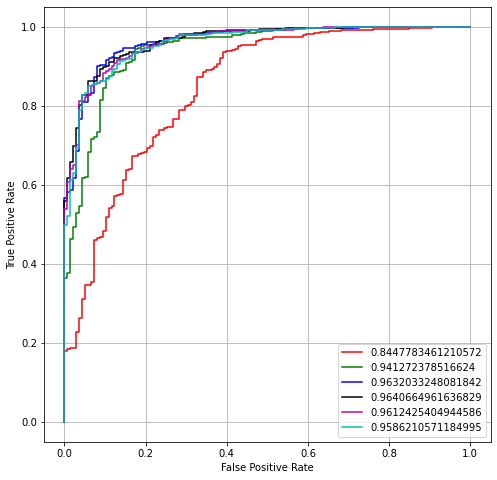

In [29]:
# Plotting the 6 ROC curves with respective AUC values
colours=['r','g','b','k','m','c']
plt.figure(figsize = (8, 8))
for i in range(len(result_fpr_L2_arr)):
    plt.plot(result_fpr_L2_arr[i],result_tpr_L2_arr[i],colours[i])
plt.gca().legend(df_log_L2['Test AUC'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

<b>Answer: Model with C=0.01 seems to be the most desirable. This is because while the complexity is 2nd-lowest, 5.8% of the most complex model (C=100, least regularized), it can achieve 98%  of the train and test AUC of the most complex model.</b>

List the 10 most important features based on the magnitude of the coefficients of the best performing model. Do the top features make sense? (3 points)

In [30]:
# Re-Obtain the best model with C=0.01
estimator_L2_best = linear_model.LogisticRegression(solver = 'liblinear', max_iter=1000, random_state=2022, C=0.01,penalty='l2') 
estimator_L2_best.fit(X_train, Y_train)

# Obtain the features and their magnitude, then sorted by magnitide
df_L2_features = pd.DataFrame(data = {'Coefficient':estimator_L2_best.coef_.tolist()[0],'Feature_Name':vectorizer.get_feature_names()})
df_L2_features['Coefficient_Magnitude'] = abs(df_L2_features['Coefficient'])
df_L2_features.sort_values(by='Coefficient_Magnitude', ascending=False).head(10)

,Coefficient,Feature_Name,Coefficient_Magnitude
2968,0.588249,great,0.588249
4737,-0.351325,not,0.351325
4151,0.337111,love,0.337111
1044,0.305903,best,0.305903
267,0.263948,amazing,0.263948
4712,-0.259366,no,0.259366
837,0.244155,awesome,0.244155
6798,0.235074,the best,0.235074
1868,0.234315,delicious,0.234315
242,0.229362,always,0.229362


<b>Answer: The top features based on their coefficient magnitudes make sense, as most of them carry clear meanings to whether a review is positive or negative. However, there are 2 features ("no" and "not") that may be ambiguous.</b>

Build 4 L1 regularized logistic regression models with C in [0.001, 0.01, 0.1, 1, 10, 100] and create a table with the below schema. Think about what is model complexity here. Comment on the observations.(4 points)

| C  | Train AUC | Model Complexity | Test AUC |
|--------|---------------|------------------|-----------|
| 0.001 |               |                  |           |
| 0.01  |               |                  |           |
| 0.1   |               |                  |           |
| 1    |               |                  |           |
| 10    |               |                  |           |
| 100   |               |                  |           |

<b>Answer:<b/>

<b>Observation: As shown in the following working and summary table, similarly to L2 penalty previously, as C increases, less penalty is imposed on more complex models. Hence the model complexity, measured by the sum of coefficients' magnitudes increases. The model train AUC values increase monotonically as its ability to fit the training data increases. However, The model test AUC peaked at C=1 and decreases thereafter. This shows sign of overfitting. One important observation is that the model complexity is now much lower in each case of C value thatn L2 penalty. L1 penalty model result in simpler models with equally good performance. <b\>

In [31]:
#C=Inverse of regularization strength, the smaller the C, the stronger the regularization, the more penalty to complex models
C_list = [0.001, 0.01, 0.1, 1, 10, 100] 
col_labels = ['C', 'Train AUC','Model Complexity - Coef Sum','Test AUC']
#using solver 'liblinear' as it supports both L1 and L2 penalty

In [32]:
result_log_L1_arr = []
result_fpr_L1_arr = []
result_tpr_L1_arr = []
for c_value in C_list:
    result_log_L1_list = []
    
    # Build the logistic regression estimator with the specified C value
    estimator_L1 = linear_model.LogisticRegression(solver = 'liblinear', max_iter=1000, random_state=2022, C=c_value,penalty='l1') 
    estimator_L1.fit(X_train, Y_train)
    # Check the class order, make sure 5 is on the 2nd column
    print('Class order:',estimator.classes_)
    if estimator_L1.classes_[1] == 5:
        print('Correct positive class selection')
    else:
        print('Incorrect positive class selection, check')
    
    # Calculate AUC_train by applying the estimator on X_train
    Y_train_pred_prob = estimator_L1.predict_proba(X_train)
    Y_train_pred_prob_5star = Y_train_pred_prob[:, 1]
    AUC_train = metrics.roc_auc_score(Y_train, Y_train_pred_prob_5star)
    
    # Calculate AUC_test by applying the estimator on X_test
    Y_test_pred_prob = estimator_L1.predict_proba(X_test)
    Y_test_pred_prob_5star = Y_test_pred_prob[:, 1]
    AUC_test = metrics.roc_auc_score(Y_test, Y_test_pred_prob_5star)
    
    # Calculate fpr and tpr from test data
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_test_pred_prob_5star, pos_label=5)
    
    # Compute complexity by sum of the model coefficients' magnitude
    complexity_coef_sum = np.sum(np.abs(estimator_L1.coef_))
    
    # Compile results
    result_log_L1_list = [c_value, AUC_train, complexity_coef_sum, AUC_test]
    result_log_L1_arr.append(result_log_L1_list)
    result_fpr_L1_arr.append(list(fpr))
    result_tpr_L1_arr.append(list(tpr))
    
    print('C value:',c_value)
    print('Model Complexity:',complexity_coef_sum)
    print('Train_AUC:', AUC_train)
    print('Test_AUC:', AUC_test,'\n')

Class order: [1 5]
Correct positive class selection
C value: 0.001
Model Complexity: 0.12495288386237775
Train_AUC: 0.47511714416478223
Test_AUC: 0.44371803069053706 

Class order: [1 5]
Correct positive class selection
C value: 0.01
Model Complexity: 1.792202645313902
Train_AUC: 0.8335210021762605
Test_AUC: 0.8155743819266837 

Class order: [1 5]
Correct positive class selection
C value: 0.1
Model Complexity: 27.583510522409874
Train_AUC: 0.9706210996860346
Test_AUC: 0.9426683716965046 

Class order: [1 5]
Correct positive class selection
C value: 1
Model Complexity: 197.96037842869092
Train_AUC: 0.9998315292279849
Test_AUC: 0.9635549872122762 

Class order: [1 5]
Correct positive class selection
C value: 10
Model Complexity: 549.6171641139986
Train_AUC: 1.0
Test_AUC: 0.9580189684569481 

Class order: [1 5]
Correct positive class selection
C value: 100
Model Complexity: 949.8044724552666
Train_AUC: 1.0
Test_AUC: 0.9633738277919864 



In [33]:
df_log_L1 = pd.DataFrame(result_log_L1_arr,columns=col_labels)
df_log_L1

,C,Train AUC,Model Complexity - Coef Sum,Test AUC
0,0.001,0.475117,0.124953,0.443718
1,0.010,0.833521,1.792203,0.815574
2,0.100,0.970621,27.583511,0.942668
3,1.000,0.999832,197.960378,0.963555
4,10.000,1.000000,549.617164,0.958019
5,100.000,1.000000,949.804472,0.963374


Plot the ROC curves for the six models you have built. Which model has the best performance? (4 points)

<b>Answer:<b/>

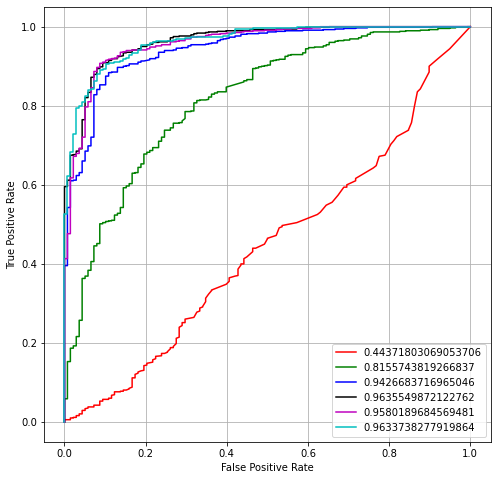

In [34]:
# Plotting the 6 ROC curves with respective AUC values
colours=['r','g','b','k','m','c']
plt.figure(figsize = (8, 8))
for i in range(len(result_fpr_L1_arr)):
    plt.plot(result_fpr_L1_arr[i],result_tpr_L1_arr[i],colours[i])
plt.gca().legend(df_log_L1['Test AUC'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

List the 10 most important features based on the magnitude of the coefficients of the best performing model. Do the top features make sense? (3 points)

<b>Answer: Model with C=0.1 seems to be the most desirable. This is because while the complexity is 3nd-lowest, 2.8% of the most complex model (C=100, least regularized), it can achieve about 98% of the train and test AUC of the most complex model.</b>

In [35]:
# Re-Obtain the best model with C=0.1
estimator_L1_best = linear_model.LogisticRegression(solver = 'liblinear', max_iter=1000, random_state=2022, C=0.1,penalty='l1') 
estimator_L1_best.fit(X_train, Y_train)

# Obtain the features and their magnitude, then sorted by magnitide
df_L1_features = pd.DataFrame(data = {'Coefficient':estimator_L1_best.coef_.tolist()[0],'Feature_Name':vectorizer.get_feature_names()})
df_L1_features['Coefficient_Magnitude'] = abs(df_L1_features['Coefficient'])
df_L1_features.sort_values(by='Coefficient_Magnitude', ascending=False).head(10)

,Coefficient,Feature_Name,Coefficient_Magnitude
2968,1.266898,great,1.266898
3362,-1.261958,horrible,1.261958
837,0.916546,awesome,0.916546
267,0.909959,amazing,0.909959
1868,0.870382,delicious,0.870382
2294,0.817100,excellent,0.817100
8565,-0.769231,worst,0.769231
5278,0.748295,perfect,0.748295
2714,0.729912,friendly,0.729912
4785,-0.686450,nothing,0.686450


<b> As mentioned previously, L1 best performing model has much lower complexity compared to the chosen model using L2 regularization. Even with this lower complexity, its top 10 most significant features carry more clear-cut positive or negative meanings than the previous L2 model. It is much easier to discern and predict 1-star and 5-star rating using these top features.There is no apparent ambiguous features in this case.</b>

<b>Summary: It is clear that Logistic regression when properly regularized can generate simple models with good quality top features that clealy indicates the connotations of the review data. It is also observed to be very fast to run. This is superior compared to the linear regression models in Task 2.

## Task 4: Naive Bayes Classifier (11 points)

In this task, you are to build a Naive Bayes model to predict the stars based on the text feature. You should reuse the previous train and test datasets and vectorized features. Use the default parameters for the MultinomiaNB model.


<b>Answer:<b/>

In [36]:
from sklearn.naive_bayes import MultinomialNB

In [37]:
df_1_and_5 = df[(df.stars == 5) | (df.stars == 1)]
# df_1_and_5.sort_values(by=['stars','date'], ascending=False)

In [38]:
x = df_1_and_5['text']
y = df_1_and_5['stars']
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 2022)

vectorizer = CountVectorizer(ngram_range = (1, 2), min_df=10)
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.fit_transform(x_test)

vectorizer.fit(x)
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)
Y_train = np.array(y_train)
Y_test = np.array(y_test)

In [39]:
mnb = MultinomialNB()
mnb.fit(X_train.toarray(), Y_train) 

MultinomialNB()

Generate the confusion matrices on both train and test sets. What do you observe? (3 points)

<b>Answer:<b/>

In [40]:
Y_test_pred = mnb.predict(X_test.toarray())
Y_train_pred = mnb.predict(X_train.toarray())

In [41]:
# Confusion Matrix on test set:
# 5-star is defined to be positive:
count_tp, count_tn, count_fp, count_fn = 0, 0, 0, 0
for i in range(len(Y_test)):
    if Y_test[i] == 5:
        if Y_test_pred[i] == 5:
            count_tp += 1
        else:
            count_fn += 1
    else:
        if Y_test_pred[i] == 5:
            count_fp += 1
        else:
            count_tn += 1
print(count_tp, '\t', count_fn)
print(count_fp, '\t', count_tn)
print('Test Accuracy:', (count_tp + count_tn) / (count_tp + count_fp + count_tn + count_fn))
print('Test Precision:', count_tp / (count_tp + count_fp))
print('Test Recall:', count_tp / (count_tp + count_fn))

642 	 38
18 	 120
Test Accuracy: 0.9315403422982885
Test Precision: 0.9727272727272728
Test Recall: 0.9441176470588235


In [42]:
# Confusion Matrix on training set:
# 5-star is defined to be positive:
count_tp, count_tn, count_fp, count_fn = 0, 0, 0, 0
for i in range(len(Y_train)):
    if Y_train[i] == 5:
        if Y_train_pred[i] == 5:
            count_tp += 1
        else:
            count_fn += 1
    else:
        if Y_train_pred[i] == 5:
            count_fp += 1
        else:
            count_tn += 1
print(count_tp, '\t', count_fn)
print(count_fp, '\t', count_tn)
print('Train Accuracy:', (count_tp + count_tn) / (count_tp + count_fp + count_tn + count_fn))
print('Train Precision:', count_tp / (count_tp + count_fp))
print('Train Recall:', count_tp / (count_tp + count_fn))

2563 	 94
44 	 567
Train Accuracy: 0.9577723378212974
Train Precision: 0.9831223628691983
Train Recall: 0.9646217538577343


<b> Observation: The model performance in terms of precision and recall is good. It is better when applied to the train data. This could be because it is where the model is fitted, hence it should perform well.<b/>

Calculate which 10 tokens are the most predictive of **5-star reviews**, and which 10 tokens are the most predictive of **1-star reviews**. (4 points)

Hint
1. Naive Bayes automatically counts the number of times each token appears in each class, as well as the number of observations in each class. You can access these counts via the `feature_count_` and `class_count_` attributes of the Naive Bayes model object.
2. Define a metric to indicate the predictiveness of a token for 5/1 star reviews.

<b>Answer: the ratio of the number of times a token appears in a class to the total observation in each class, `Count_Ratio`,can be used to normalize the frequency of appearance of the tokens, and used as a metric to measure predictiveness. The higher the number, the more frequently a token appears in a class vs the total class occurence, the more important the token is in predicting the class.<b/>

In [43]:
df_1Star_features = pd.DataFrame(data = {'1-Star_Feature_Count':mnb.feature_count_.tolist()[0],'Feature_Name':vectorizer.get_feature_names()})
df_1Star_features['Count_Ratio']=df_1Star_features['1-Star_Feature_Count']/mnb.class_count_[0]
df_1Star_features.sort_values(by='Count_Ratio',ascending=False).head(10)

,1-Star_Feature_Count,Feature_Name,Count_Ratio
6770,4592.0,the,7.515548
300,2882.0,and,4.716858
7480,2622.0,to,4.291326
8008,1633.0,was,2.672668
3705,1418.0,it,2.320786
4818,1397.0,of,2.286416
6690,1058.0,that,1.731588
3468,1037.0,in,1.697218
2571,1034.0,for,1.692308
4540,961.0,my,1.572831


In [44]:
df_5Star_features = pd.DataFrame(data = {'5-Star_Feature_Count':mnb.feature_count_.tolist()[1],'Feature_Name':vectorizer.get_feature_names()})
df_5Star_features['Count_Ratio']=df_5Star_features['5-Star_Feature_Count']/mnb.class_count_[1]
df_5Star_features.sort_values(by='Count_Ratio',ascending=False).head(10)

,5-Star_Feature_Count,Feature_Name,Count_Ratio
6770,15078.0,the,5.674821
300,11143.0,and,4.193828
7480,6886.0,to,2.591645
4818,4894.0,of,1.841927
3591,4636.0,is,1.744825
3705,4570.0,it,1.719985
8008,3766.0,was,1.417388
3468,3677.0,in,1.383892
2571,3479.0,for,1.309371
8639,3107.0,you,1.169364


Comment on the top tokens of 5-star and 1 star reviews. Do these tokens make sense? (4 points)

<b> Answer: the top tokens as ranked by `Count_Ratio` do not appear to be good predictors. This is because they are merely connecting words used in normal English language (stop words), hence they naturally appear more frequently. Other opinion-carrying words do not appear as frequently and hence are not in the top.<br> 
    Below, the parameter `stop_words` is used in the NB classifier to help remove the influence of these stop words.<b/>

<b>Observation: After re-running the classifier with stop_words below, it is seen that the top tokens for 5-star reviews are now carrying more positive connotation, such as "great", "good" and "best". However, the 1-star top tokens, although not having stop words, are now neutral words. Hence they are still not good indicators of negative reviews from the perspective of the actual natural language. 

<b>Overall, NB Classifier seems to perform worse than logistic regression in generating top predictors for negative and positive reviews. Logistic regression, especially when properly regularized, performs well even without utilizing stop words removal by `CountVectorizer`. <b/>

In [45]:
x = df_1_and_5['text']
y = df_1_and_5['stars']
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 2022)

vectorizer = CountVectorizer(ngram_range = (1, 2), min_df=10,stop_words='english')
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.fit_transform(x_test)

vectorizer.fit(x)
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)
Y_train = np.array(y_train)
Y_test = np.array(y_test)

In [46]:
mnb = MultinomialNB()
mnb.fit(X_train.toarray(), Y_train) 

MultinomialNB()

In [47]:
Y_test_pred = mnb.predict(X_test.toarray())
Y_train_pred = mnb.predict(X_train.toarray())

In [48]:
# Confusion Matrix on test set:
# 5-star is defined to be positive:
count_tp, count_tn, count_fp, count_fn = 0, 0, 0, 0
for i in range(len(Y_test)):
    if Y_test[i] == 5:
        if Y_test_pred[i] == 5:
            count_tp += 1
        else:
            count_fn += 1
    else:
        if Y_test_pred[i] == 5:
            count_fp += 1
        else:
            count_tn += 1
print(count_tp, '\t', count_fn)
print(count_fp, '\t', count_tn)
print('Test Accuracy:', (count_tp + count_tn) / (count_tp + count_fp + count_tn + count_fn))
print('Test Precision:', count_tp / (count_tp + count_fp))
print('Test Recall:', count_tp / (count_tp + count_fn))

648 	 32
18 	 120
Test Accuracy: 0.9388753056234719
Test Precision: 0.972972972972973
Test Recall: 0.9529411764705882


In [49]:
# Confusion Matrix on training set:
# 5-star is defined to be positive:
count_tp, count_tn, count_fp, count_fn = 0, 0, 0, 0
for i in range(len(Y_train)):
    if Y_train[i] == 5:
        if Y_train_pred[i] == 5:
            count_tp += 1
        else:
            count_fn += 1
    else:
        if Y_train_pred[i] == 5:
            count_fp += 1
        else:
            count_tn += 1
print(count_tp, '\t', count_fn)
print(count_fp, '\t', count_tn)
print('Train Accuracy:', (count_tp + count_tn) / (count_tp + count_fp + count_tn + count_fn))
print('Train Precision:', count_tp / (count_tp + count_fp))
print('Train Recall:', count_tp / (count_tp + count_fn))

2555 	 102
51 	 560
Train Accuracy: 0.9531823745410036
Train Precision: 0.9804297774366846
Train Recall: 0.9616108392924351


In [50]:
df_1Star_features = pd.DataFrame(data = {'1-Star_Feature_Count':mnb.feature_count_.tolist()[0],'Feature_Name':vectorizer.get_feature_names()})
df_1Star_features['Count_Ratio']=df_1Star_features['1-Star_Feature_Count']/mnb.class_count_[0]
df_1Star_features.sort_values(by='Count_Ratio',ascending=False).head(10)

,1-Star_Feature_Count,Feature_Name,Count_Ratio
1213,465.0,food,0.761047
2345,405.0,place,0.662848
1820,348.0,like,0.569558
1711,325.0,just,0.531915
2817,281.0,service,0.459902
1361,252.0,good,0.412439
3219,248.0,time,0.405892
921,221.0,don,0.361702
2200,178.0,ordered,0.291326
2045,169.0,minutes,0.276596


In [51]:
df_5Star_features = pd.DataFrame(data = {'5-Star_Feature_Count':mnb.feature_count_.tolist()[1],'Feature_Name':vectorizer.get_feature_names()})
df_5Star_features['Count_Ratio']=df_5Star_features['5-Star_Feature_Count']/mnb.class_count_[1]
df_5Star_features.sort_values(by='Count_Ratio',ascending=False).head(10)

,5-Star_Feature_Count,Feature_Name,Count_Ratio
1412,1634.0,great,0.614979
2345,1611.0,place,0.606323
1213,1366.0,food,0.514114
1361,1336.0,good,0.502823
1820,1030.0,like,0.387655
1711,1014.0,just,0.381633
1897,886.0,love,0.333459
3219,834.0,time,0.313888
296,774.0,best,0.291306
3372,771.0,ve,0.290177
